In [24]:
import itertools
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1]:
model = SentenceTransformer('djovak/embedic-large')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/171 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.20k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/799 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

[[-0.0006191  -0.01398638 -0.04349571 ... -0.02825317 -0.0346139
   0.00834244]
 [ 0.01229073  0.00650184 -0.04806048 ... -0.01539413 -0.0452978
   0.0067113 ]
 [ 0.01737759 -0.02313317 -0.0370433  ... -0.00069481 -0.01052742
  -0.0007528 ]]


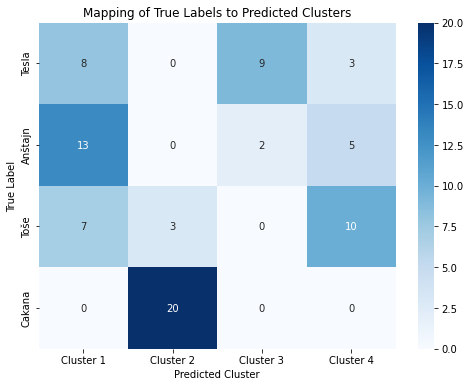

In [38]:
sentences = [
    # Nikola Tesla
    "Nikola Tesla je rođen 10. jula 1856. godine u Smiljanu.",
    "Bio je jedan od najvećih pronalazača svih vremena.",
    "Njegov rad na naizmeničnoj struji promenio je svet.",
    "Tesla je izumeo Teslin kalem.",
    "Razvio je prvi radio pred Marconija.",
    "Patentirao je više od 300 pronalazaka.",
    "Njegova laboratorija u Kolorado Springsu bila je centar istraživanja.",
    "Tesla je imao viziju bežične energije.",
    "Sarađivao je sa Edisonom, ali su se razišli zbog nesuglasica.",
    "Njegova turbina bila je inovativna, ali nije komercijalizovana.",
    "Tesla je predvideo bežičnu komunikaciju.",
    "Mnoge njegove ideje bile su ispred vremena.",
    "Njegova istraživanja inspirisala su brojne naučnike.",
    "Tesla je tvrdio da je imao kontakt sa vanzemaljcima.",
    "Njegove teorije o besplatnoj energiji ostale su kontroverzne.",
    "Njegova smrt 1943. godine prošla je bez velike pažnje.",
    "Njegovi radovi su kasnije otkriveni i korišćeni.",
    "Tesla je bio poznat po ekscentričnosti.",
    "Mnogi ga smatraju nepriznatim genijem.",
    "Njegov lik se nalazi na novčanici od 100 dinara u Srbiji.",
    # Albert Ajnštajn
    "Albert Ajnštajn je rođen 1879. godine u Nemačkoj.",
    "Njegova teorija relativnosti promenila je fiziku.",
    "Dobio je Nobelovu nagradu za fotoelektrični efekat.",
    "E=mc^2 je jedna od najpoznatijih jednačina.",
    "Njegov rad je imao ključnu ulogu u razvoju kvantne mehanike.",
    "Pobegao je iz Nemačke pred nacistima.",
    "Radio je na Prinstonu do kraja života.",
    "Ajnštajn je bio poznat po svojoj pacifističkoj politici.",
    "Pisao je pismo Ruzveltu o mogućnosti nuklearnog oružja.",
    "Njegov mozak je sačuvan i proučavan.",
    "Bio je veliki zagovornik građanskih prava.",
    "Nikada nije voleo formalno obrazovanje.",
    "Bio je talentovan i za muziku.",
    "Njegove teorije i danas oblikuju modernu fiziku.",
    "Nije bio direktno uključen u Projekat Menhetn.",
    "Njegova slika sa izbačenim jezikom postala je ikonična.",
    "Njegova pisma otkrivaju njegovu humanost.",
    "Verovao je u deterministički univerzum.",
    "Njegov rad je inspirisao generacije naučnika.",
    "Preminuo je 1955. godine u Americi.",
    # Toše Proeski
    "Toše Proeski je bio makedonski pevač.",
    "Rođen je 1981. godine u Kruševu.",
    "Njegova karijera je započela u mladosti.",
    "Osvojio je brojne nagrade za svoj rad.",
    "Njegov hit 'Čija si' postao je klasik.",
    "Pevao je na Balkanu i šire.",
    "Bio je poznat po humanitarnom radu.",
    "Njegov glas je bio prepoznatljiv i emotivan.",
    "Tragično je preminuo 2007. godine.",
    "Njegova muzika živi i danas.",
    "Bio je ambasador dobre volje UNICEF-a.",
    "Njegov poslednji album izašao je posthumno.",
    "Ostavio je veliki uticaj na muzičku scenu.",
    "Njegov koncert u Beogradu bio je nezaboravan.",
    "Mnogi fanovi ga i dalje pamte i poštuju.",
    "Njegova muzika je spoj emocija i energije.",
    "Njegova pesma 'Igra bez granica' je večni hit.",
    "Bio je voljen širom Balkana.",
    "Njegova porodica čuva sećanje na njega.",
    "Toše Proeski ostaje legenda balkanske muzike.",
    # Cakana
    "Cakana je poznata srpska pevačica.",
    "Njen glas je prepoznatljiv na estradi.",
    "Karijeru je započela osamdesetih godina.",
    "Poznata je po narodnoj muzici.",
    "Njeni hitovi su popularni među ljubiteljima folka.",
    "Često nastupa na televiziji.",
    "Njeni koncerti su puni emocija.",
    "Ona je prisutna na muzičkoj sceni decenijama.",
    "Njen stil je autentičan i prepoznatljiv.",
    "Sarađivala je sa mnogim muzičarima.",
    "Njena publika je verna i brojna.",
    "Njene pesme nose tradicionalni zvuk.",
    "Pevala je širom Balkana.",
    "Njena muzika je deo narodnog melosa.",
    "Nastupa na festivalima i događajima.",
    "Njeni spotovi imaju veliki broj pregleda.",
    "Njena diskografija je bogata hitovima.",
    "Ostala je dosledna svom muzičkom pravcu.",
    "Njena energija na sceni je prepoznatljiva.",
    "Cakana je ikona narodne muzike."
]

# Kreiranje embeddings
# model = SentenceTransformer('djovak/embedic-large')
embeddings = model.encode(sentences)

# Klasterovanje u 4 grupe
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(embeddings)

# Upoređivanje sa originalnim grupama
true_labels_unique = ['Tesla', 'Anštajn', 'Toše', 'Cakana']
true_labels = [[x] * 20 for x in true_labels_unique]
true_labels = list(itertools.chain.from_iterable(true_labels))


true_label_mapping = {name: i for i, name in enumerate(true_labels_unique)}
true_labels_numeric = np.array([true_label_mapping[label] for label in true_labels])

# Compute contingency matrix
contingency = confusion_matrix(true_labels_numeric, labels)

# Plot heatmap with true labels on y-axis
plt.figure(figsize=(8, 6))
sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Cluster {i+1}' for i in range(contingency.shape[1])], 
            yticklabels=true_labels_unique)  # Add true labels on y-axis
plt.xlabel('Predicted Cluster')
plt.ylabel('True Label')
plt.title('Mapping of True Labels to Predicted Clusters')
plt.show()


In [33]:
# CAKANA is most predictable!